<a href="https://colab.research.google.com/github/otopiachka/markdown-doc/blob/master/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A1%D0%BE%D1%80%D0%BE%D0%BA%D0%B8%D0%BD_%D0%90_%D0%A1_%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D0%B0_1459.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <center> Итоговое задание </center>
### <center> Выполнил  Сорокин А.С. группа 1459 </center>
#### <center> Определение количества слов в книге Adventures of Huckleberry Finn by Mark Twain </center>
#### Описание задачи 
##### необходимо определить количество слов книги Adventures of Huckleberry Finn by Mark Twain,  расположенной на https://www.gutenberg.org/files/76/76-h/76-h.htm с использованием  NLP.
##### Выполнение это задачи предполагает 
##### 1. C использованием инструментов обработки текста выделить текст c сайта
##### 2. Токенизировать текст
##### 3. Загрузить в стоп-слова и удалить их из текста книги
##### 4. Найти ответ на вопрос с использованием графики

#### 1. Подготовка данных

In [1]:
# Присвоим переменной url адрес сайта
url = 'https://www.gutenberg.org/files/76/76-h/76-h.htm'


In [2]:
# Импортируем Библиотеку запросов `requests`,позволяющей отправлять запросы HTTP в Python.

import requests

# присвоем переменной r информацию с сайта
r = requests.get(url)

#Проверяем
type(r)

requests.models.Response

In [3]:
# Излекаем HTML код в виде текста и присваеваем его переменной html
html = r.text

# проверяем
# print(html)

In [4]:
# Импортируем Библиотеку парсинга `BeautifulSoup`,осуществляющая парсинг HTML в Python.
from bs4 import BeautifulSoup

# Создаем обьект с применением функции BeautifulSoup
soup = BeautifulSoup(html, "html5lib")
#print(soup)

In [5]:
# Тоже самое но в виде строки
soup.title.string

'\n      HUCKLEBERRY FINN, By Mark Twain, Complete\n    '

In [6]:
# Назначаем переменную text, выводим текст 
text = soup.get_text()
# print(text)

#### 2.   Работа с текстом с применением NLP

In [7]:
# Подключаем пакет regex package
import re

# Находим все слова в данных и выводим 10 из них
tokens = re.findall('\w+', text)
tokens[:10]

['ï',
 'HUCKLEBERRY',
 'FINN',
 'By',
 'Mark',
 'Twain',
 'Complete',
 'body',
 'margin',
 '5']

In [8]:
# Подключаем библиотеку и токенизируем слова- RegexpTokenizer from nltk.tokenize
from nltk.tokenize import RegexpTokenizer

# Токенезируем
tokenizer = RegexpTokenizer('\w+')

# создаем переменную и выводим ее
tokens = tokenizer.tokenize(text)
# выводим 10 из них
tokens[:10]

['ï',
 'HUCKLEBERRY',
 'FINN',
 'By',
 'Mark',
 'Twain',
 'Complete',
 'body',
 'margin',
 '5']

In [9]:
# Создадим список, содержащий все слова в в книге Adventures of Huckleberry Finn by Mark Twain
# причём сделем так, чтобы все слова содержали только строчные буквы.
words = []

# Пройдём циклом по нашему токену и сформируем список из строчных букв
for word in tokens:
    words.append(word.lower())

# проверим 12 из них
words[:12]


['ï',
 'huckleberry',
 'finn',
 'by',
 'mark',
 'twain',
 'complete',
 'body',
 'margin',
 '5',
 'background',
 'faebd0']

#### 3.Удаление стоп-слов ( местоимения ,союзы и т.д. c помощью имеющихся библиотек)

In [10]:
# Импортируем пакет nltk, он содержит стоп-слова
import nltk
nltk.download('stopwords')

# Выводим для примера 8 из них
sw = nltk.corpus.stopwords.words('english')
sw[:8]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

In [11]:
# Создаем новый список без стоп-слов
# Создаем пустой список
words_ns = []

# Проходим циклом для исключения стоп-слов и формирования нового списка
for word in words:
    if word not in sw:
        words_ns.append(word)

# Выведем  6 слов для примера из нового списка
words_ns[1:7]

['huckleberry', 'finn', 'mark', 'twain', 'complete', 'body']

#### 4. Определим количество слов в книге с помощью графики и ответим на вопрос какие слова, наиболее часто встречаются.


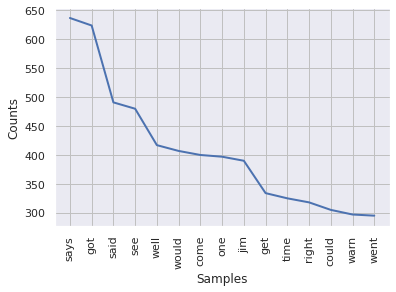

In [12]:
# Подключаем библиотеки визуализации 
import matplotlib.pyplot as plt
import seaborn as sns

# Выберем стиль визуализации данных
%matplotlib inline
sns.set()

# Создаём объект распределения слов с помощью метода FreqDist. 
freqdist1 = nltk.FreqDist(words_ns)

# Выводим 15 смых частовстречаемых слов.
freqdist1.plot(15)

#### Результат: Самое часто втречающееся слово в книге - слово "говорит" (says)

##### Далее добавим  стоп-слова из библиотеки sklearn

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


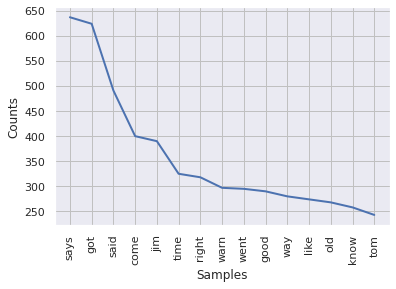

In [13]:
# Импортируем стоп-слова из библиотеки sklearn
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

# Добавим имеющиеся эти слова к уже имеющимся стоп-словам 
sw = set(sw + list(ENGLISH_STOP_WORDS))

# Создадим новый список с учетом увеличенного числа стоп-слов
#создаем список
words_ns = []

# Циклом включаем в него все слова которые не являются "стоп-словом"
for word in words:
    if word not in sw:
        words_ns.append(word)

# Создаем и выводим полученный список
freqdist2 = nltk.FreqDist(words_ns)
freqdist2.plot(15)


### Вывод: 
#### Самое часто встречающееся слово в книге - слово "говорит" (says). Оно используется 650 раз. Как видно при увеличении количества стоп-слов выдача изменилась в ней были исключены слова see, wel, would, one, get, could.